In [1]:
import pandas as pd #for numerical functions
import numpy as np #for data processing
import matplotlib.pyplot as mlt #for visualisation 
import seaborn as sns # for visualisation
import datetime  
import time 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
cd C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\EDA Exploratory data analysis\Assignments EDA

C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\EDA Exploratory data analysis\Assignments EDA


In [4]:
df = pd.read_csv("EDA_Practice_Dataset_1_Bestseller_with_Categoriestopic_added1621240676s_p2076906743.csv")

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
df.info()#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.7+ KB


In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


#as there are no null values and #data types and values seem fine;will check column univariate analysis ,and ,through heat plot ill be checking the correlation between ,columns for bivariate analysis

also look for skewness and kurtosis for data distribution and curves

# UNIVARIATE ANALYSIS

FOR FINDING RELATIONSHIP OF THE COLUMN WITH IT'S SELF

#BOOKS BY GENRE

In [10]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

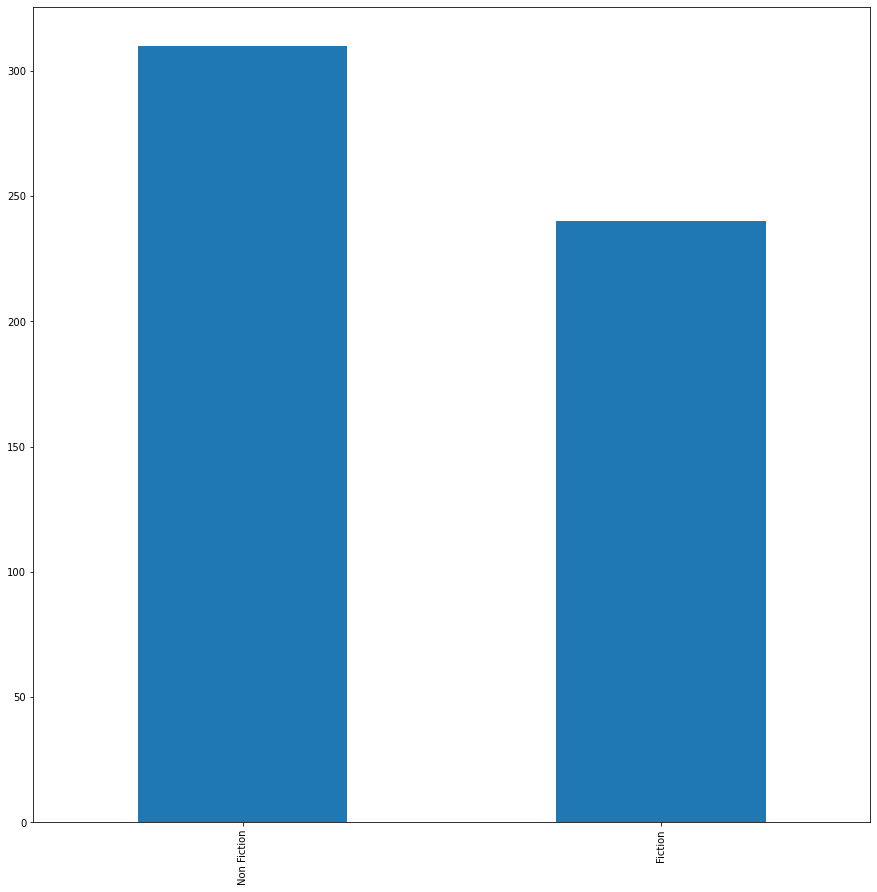

In [30]:
df.Genre.value_counts().nlargest(10).plot(kind="bar",figsize = (15,15))
mlt.show()

In [23]:
df["Genre"].value_counts() #as you can see the bar presented is accordance to the values

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

-x

#TOP 10 NOVELS BY NAME

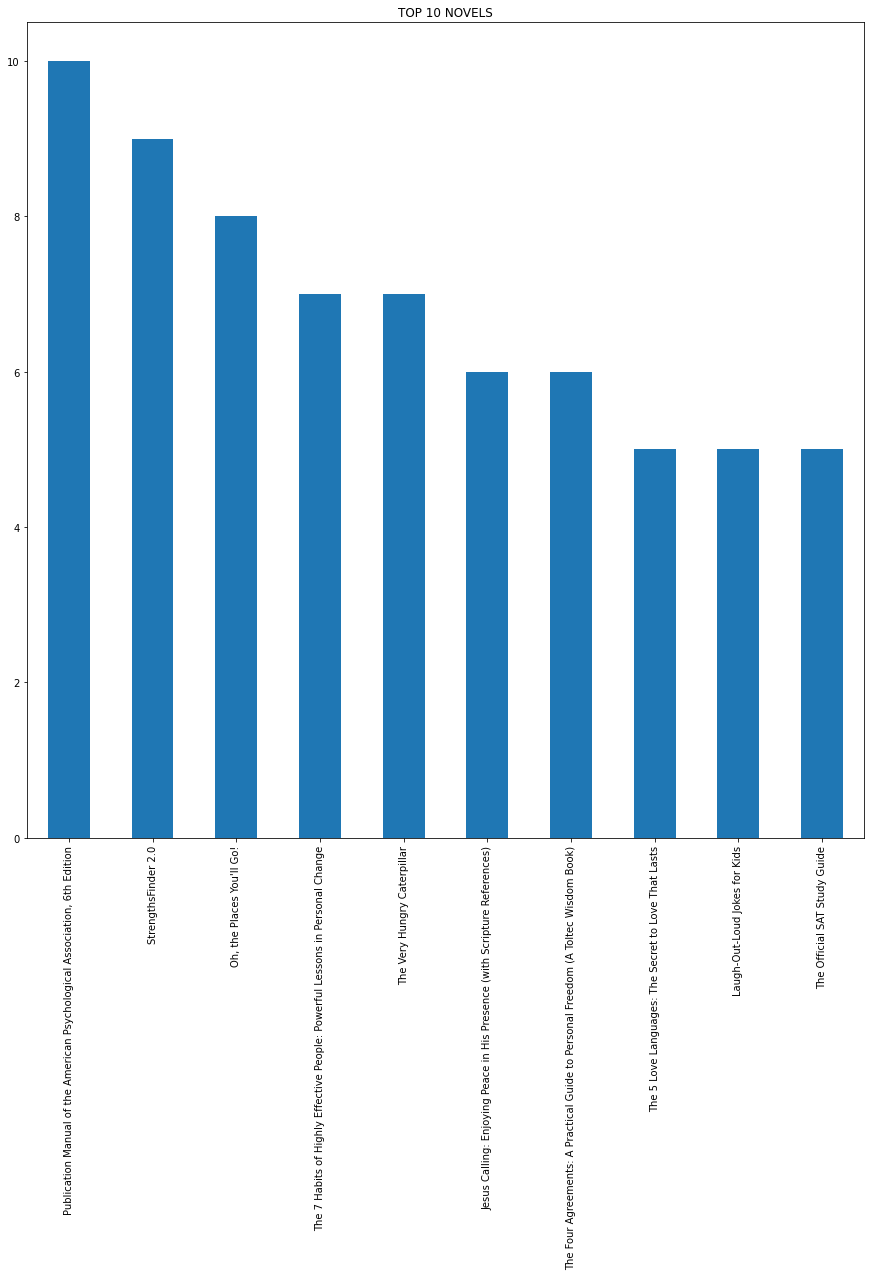

In [73]:
dff1 =df.Name.value_counts().nlargest(10).plot(kind = "bar",figsize = (15,15))
mlt.title("TOP 10 NOVELS")
mlt.show()

-x

#TOP 10 AUTHORS

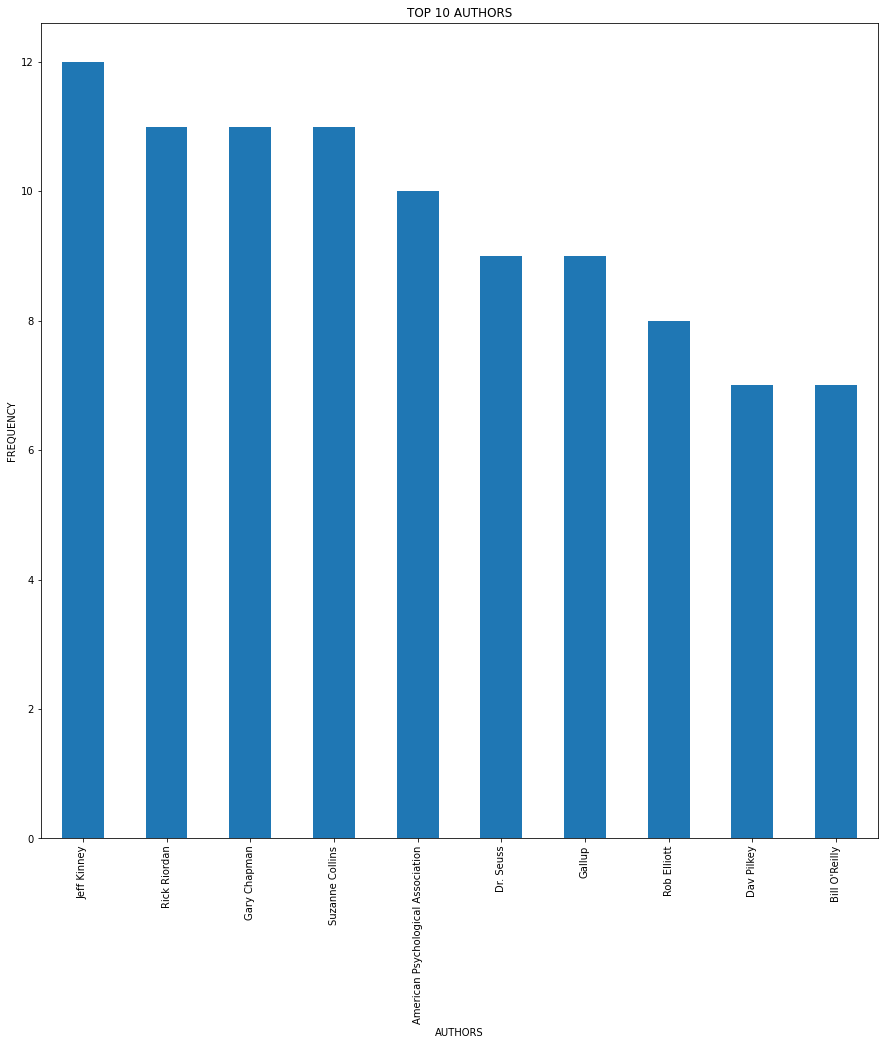

In [33]:
df.Author.value_counts().nlargest(10).plot(kind = "bar",figsize = (15,15))
mlt.title("TOP 10 AUTHORS")
mlt.xlabel("AUTHORS")
mlt.ylabel("FREQUENCY")
mlt.show()

#above graphs shows top 10 authors with Jeff Kinney the most prefered for his novels

-x

#BOOK PRICE RANGE

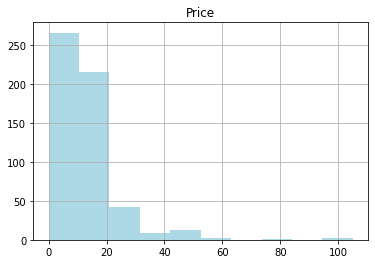

In [36]:
df.hist(column = "Price",bins = 10,color = "lightblue")
mlt.show()

#above graph shows that more than 250 books are in the price range 0-20 dollars, varying from range 0 - 100 ,with only few books in price range 60-80 dollars

-x

#YEAR OF PUBLISH

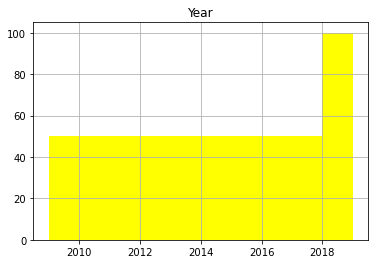

In [38]:
df.hist(column = "Year",bins = 10,color = "yellow");

#above graph shows the year of publish of books ; here you can see steady publishings from year 2010 to 2018 , it is after 2018-2019 publishing increased above 50 books a year doubling after 2018

#a left skewed curve(negative distribution) can be seen here 

# BIVARIATE ANALYSIS

In [ ]:
 #FINDING CORRELATION BETWEEN COLUMNS

In [39]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


#HEATMAP FOR THE SAME

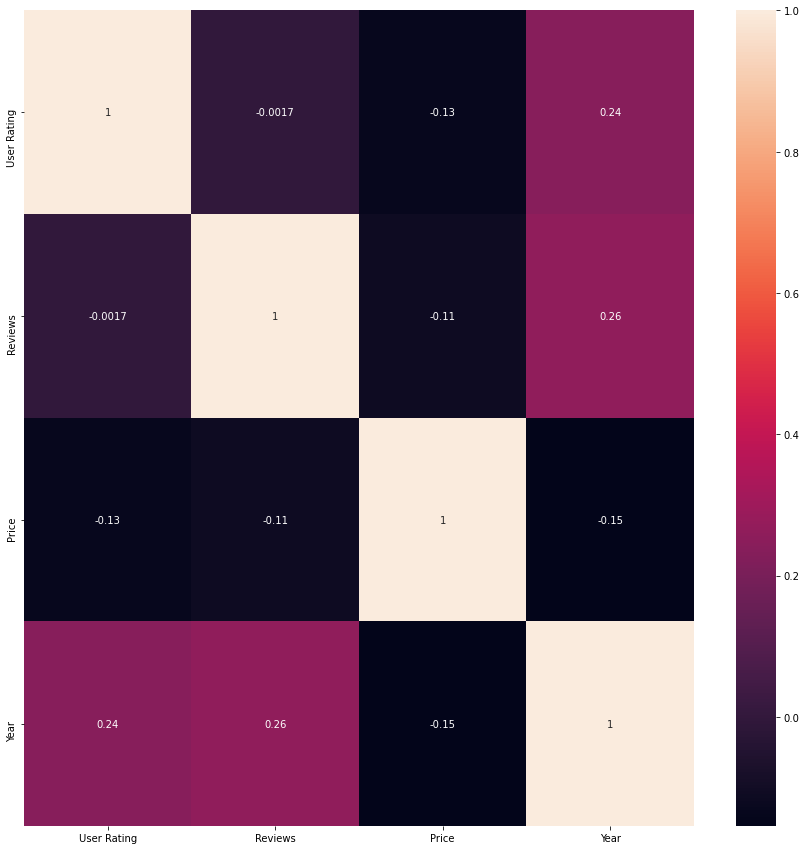

In [42]:
mlt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

In [ ]:
#BOX PLOT FOR Genre wise Pricing over the years

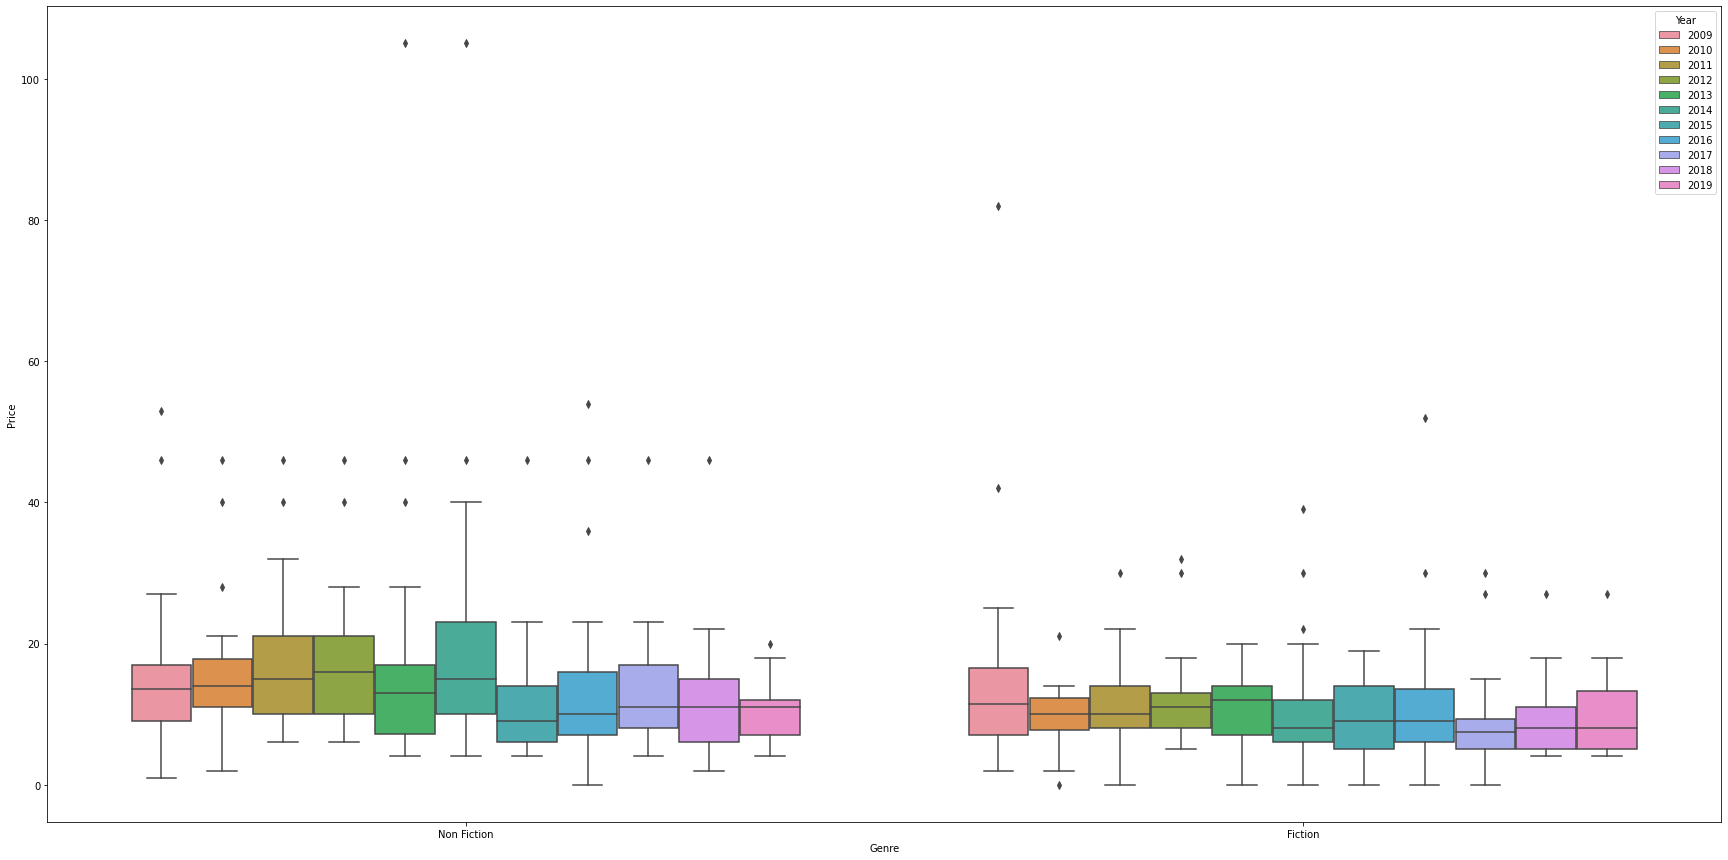

In [92]:
mlt.rcParams["figure.figsize"]=(30,15)
sns.boxplot(x ="Genre",y = "Price",data = df,hue = "Year")
mlt.show()

#USER RATING GENRE BOXPLOT

<AxesSubplot:xlabel='Genre', ylabel='User Rating'>

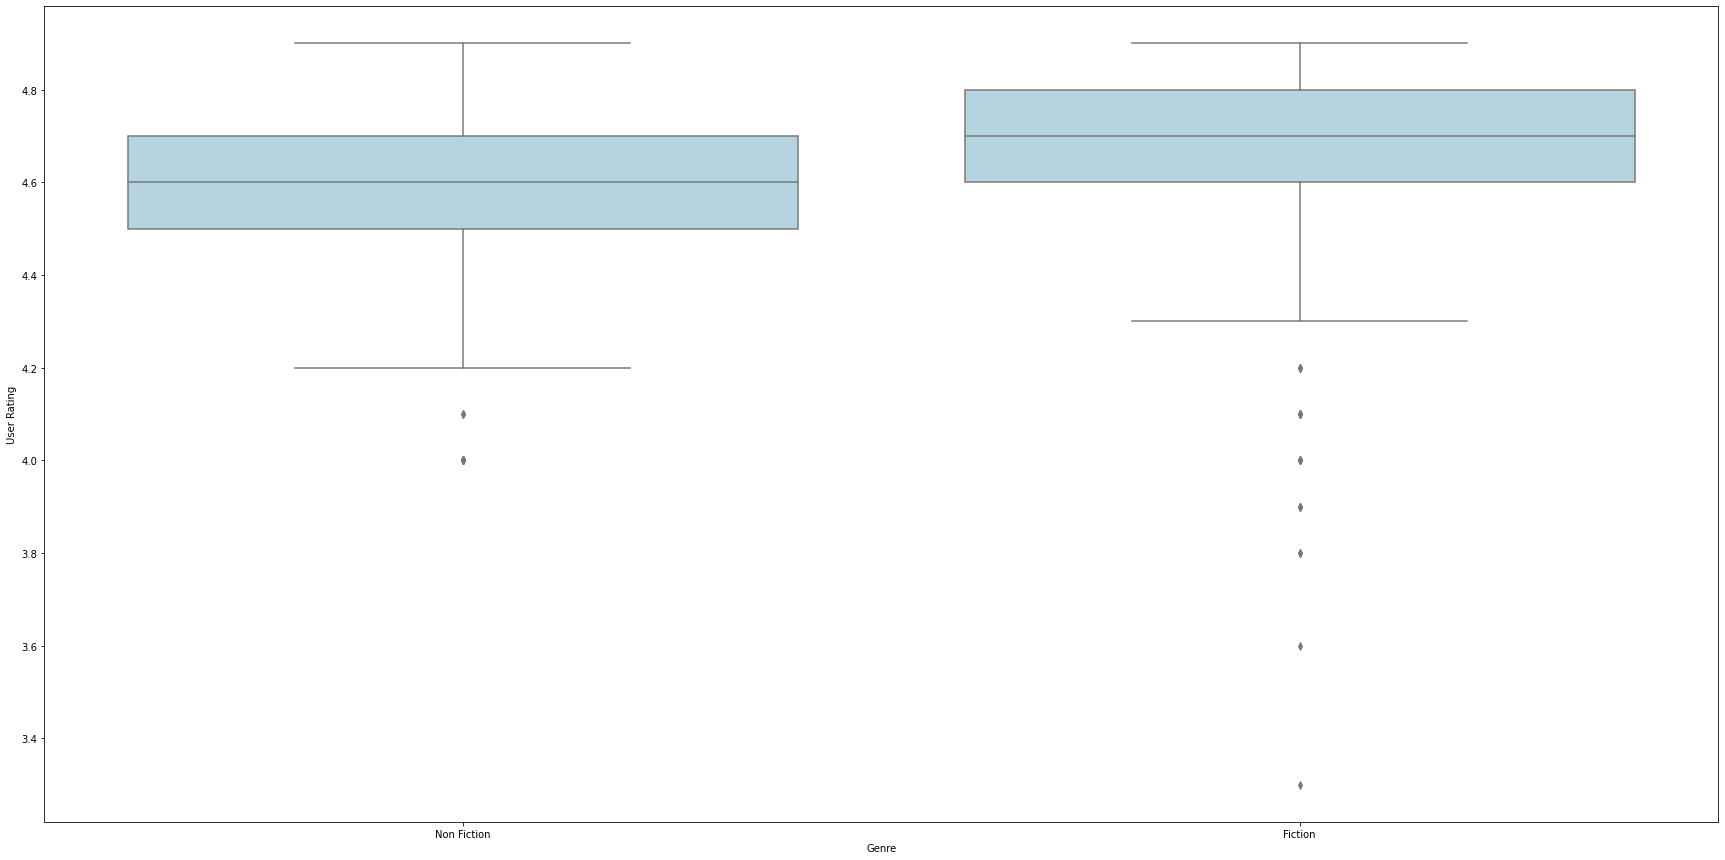

In [99]:
sns.boxplot(x = "Genre",y = "User Rating",data = df,color = "lightblue")

#SKEWNESS & KURTOSIS FOR PRICE

skewness 3.685056537836339
Kurtosis 22.43352032785043


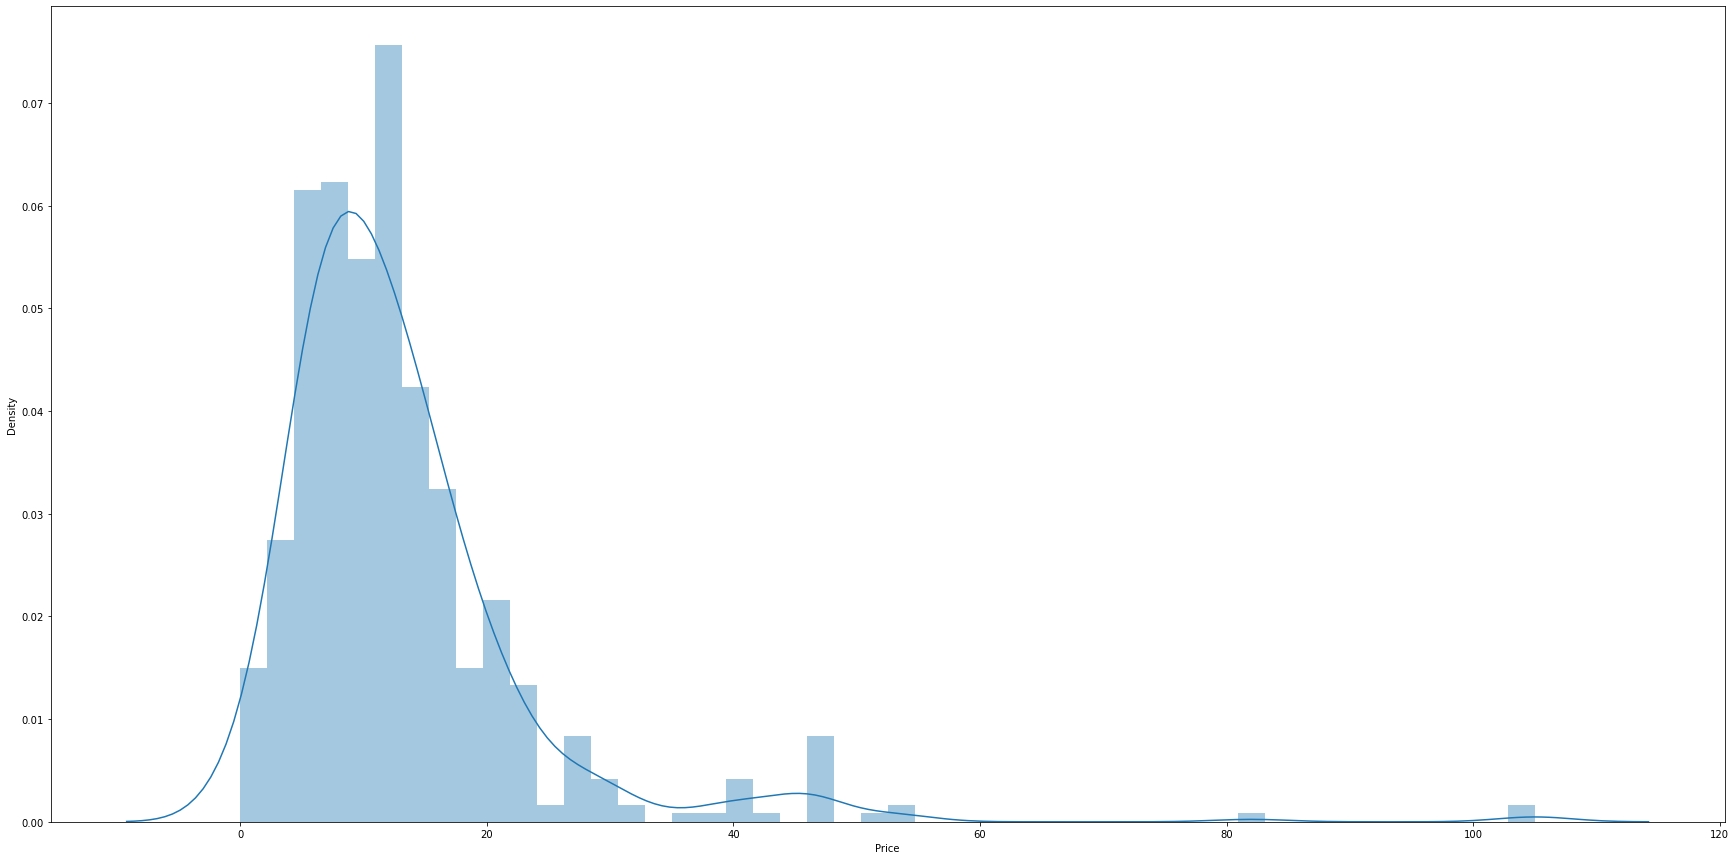

In [103]:
sns.distplot(df["Price"])
print("skewness",df["Price"].skew())
print("Kurtosis",df["Price"].kurt())

#Above dist plot shows the skewness and kurtosis of the price range of the books:
Also you can see the Skewness of the curve is on right hand side as tail of the curve lay there,
this shows a positive distribution of the data ,meaning mean here is greater than mode,median greater than mode,mean is greater than the median

Here the majority of books are in price range 0-20 , hence kurtosis is positive that the more weight lies in the tail.

-x